# Aprendizaje Automático - Proyecto Final
## Tratamiento de los datos y visualización

In [46]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

pd.options.mode.chained_assignment = None

Leemos el archivo y visualizamos las 10 primeras filas:

In [47]:
dt = pd.read_csv("heart.csv")
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Cocinamos** los datos, traduciendo los nombres de cada columna y dándole un nombre más significativo si es necesario:

In [48]:
dt.columns = ['edad', 'sexo', 'dolor', 
              'tension', 'colesterol', 'glucemia', 
              'ecg', 'frec_cardiaca', 'angina_ej', 
              'depresion_st', 'pendiente_st', 
              'num_valvulas', 'test_talio', 
              'enfermedad']

dt['sexo'][dt['sexo'] == 0] = 'mujer'
dt['sexo'][dt['sexo'] == 1] = 'varon'
dt['dolor'][dt['dolor'] == 0] = 'asintomatico'
dt['dolor'][dt['dolor'] == 1] = 'angina atipica'
dt['dolor'][dt['dolor'] == 2] = 'no anginoso'
dt['dolor'][dt['dolor'] == 3] = 'angina tipica'
dt['glucemia'][dt['glucemia'] == 0] = '<120 mg/ml'
dt['glucemia'][dt['glucemia'] == 1] = '>120 mg/ml'
dt['ecg'][dt['ecg'] == 0] = 'hipertrofia VI'
dt['ecg'][dt['ecg'] == 1] = 'normal'
dt['ecg'][dt['ecg'] == 2] = 'anomalia ST-T'
dt['angina_ej'][dt['angina_ej'] == 0] = 'no'
dt['angina_ej'][dt['angina_ej'] == 1] = 'si'
dt['pendiente_st'][dt['pendiente_st'] == 0] = 'decreciente'
dt['pendiente_st'][dt['pendiente_st'] == 1] = 'plana'
dt['pendiente_st'][dt['pendiente_st'] == 2] = 'creciente'
dt['test_talio'][dt['test_talio'] == 1] = 'defecto permanente'
dt['test_talio'][dt['test_talio'] == 2] = 'normal'
dt['test_talio'][dt['test_talio'] == 3] = 'defecto reversible'
dt['enfermedad'][dt['enfermedad'] == 0] = 'no'
dt['enfermedad'][dt['enfermedad'] == 1] = 'si'

dt.head()

,edad,sexo,dolor,tension,colesterol,glucemia,ecg,frec_cardiaca,angina_ej,depresion_st,pendiente_st,num_valvulas,test_talio,enfermedad
0,63,varon,angina tipica,145,233,>120 mg/ml,hipertrofia VI,150,no,2.3,decreciente,0,defecto permanente,si
1,37,varon,no anginoso,130,250,<120 mg/ml,normal,187,no,3.5,decreciente,0,normal,si
2,41,mujer,angina atipica,130,204,<120 mg/ml,hipertrofia VI,172,no,1.4,creciente,0,normal,si
3,56,varon,angina atipica,120,236,<120 mg/ml,normal,178,no,0.8,creciente,0,normal,si
4,57,mujer,asintomatico,120,354,<120 mg/ml,normal,163,si,0.6,creciente,0,normal,si


In [49]:
dt['sexo'] = dt['sexo'].astype('object')
dt['dolor'] = dt['dolor'].astype('object')
dt['glucemia'] = dt['glucemia'].astype('object')
dt['ecg'] = dt['ecg'].astype('object')
dt['angina_ej'] = dt['angina_ej'].astype('object')
dt['pendiente_st'] = dt['pendiente_st'].astype('object')
dt['test_talio'] = dt['test_talio'].astype('object')

dt.dtypes

edad               int64
sexo              object
dolor             object
tension            int64
colesterol         int64
glucemia          object
ecg               object
frec_cardiaca      int64
angina_ej         object
depresion_st     float64
pendiente_st      object
num_valvulas       int64
test_talio        object
enfermedad        object
dtype: object

Con esto, podemos ver cuántos pacientes de la muestra se ven afectados por una **enfermedad cardíaca**:

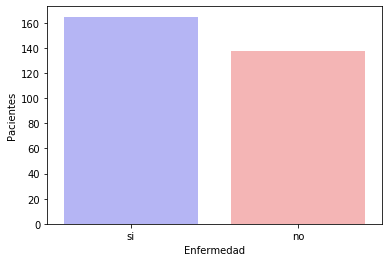

In [50]:
sns.countplot(x="enfermedad", data=dt, palette="bwr")
plt.ylabel("Pacientes")
plt.xlabel("Enfermedad")
plt.show()

In [51]:
dt.enfermedad.value_counts()

si    165
no    138
Name: enfermedad, dtype: int64

In [52]:
countNoDisease = len(dt[dt.enfermedad == 'no'])
countHaveDisease = len(dt[dt.enfermedad == 'si'])
print("Porcentaje de pacientes que no padecen una enfermedad cardíaca: {:.2f}%".format((countNoDisease / (len(dt.enfermedad))*100)))
print("Porcentaje de pacientes que sí padecen una enfermedad cardíaca: {:.2f}%".format((countHaveDisease / (len(dt.enfermedad))*100)))

Porcentaje de pacientes que no padecen una enfermedad cardíaca: 45.54%
Porcentaje de pacientes que sí padecen una enfermedad cardíaca: 54.46%


Ahora, podemos disgregar la muestra por sexos:

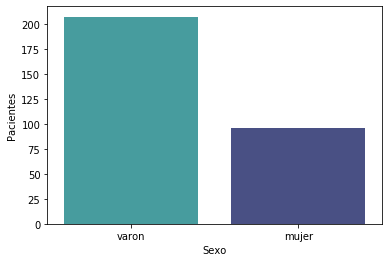

In [53]:
sns.countplot(x='sexo', data=dt, palette="mako_r")
plt.ylabel("Pacientes")
plt.xlabel("Sexo")
plt.show()

In [54]:
dt.sexo.value_counts()

varon    207
mujer     96
Name: sexo, dtype: int64

In [55]:
countWomen = len(dt[dt.sexo == 'mujer'])
countMen = len(dt[dt.sexo == 'varon'])
print("Porcentaje de pacientes mujeres: {:.2f}%".format((countWomen / (len(dt.sexo))*100)))
print("Porcentaje de pacientes varones: {:.2f}%".format((countMen / (len(dt.sexo))*100)))

Porcentaje de pacientes mujeres: 31.68%
Porcentaje de pacientes varones: 68.32%


También podemos visualizar los **valores medios** de algunas categorías en relación a los pacientes que tienen o no enfermedad:

In [56]:
dt.groupby('enfermedad').mean()

,edad,tension,colesterol,frec_cardiaca,depresion_st,num_valvulas
enfermedad,,,,,,
no,56.601449,134.398551,251.086957,139.101449,1.585507,1.166667
si,52.496970,129.303030,242.230303,158.466667,0.583030,0.363636


Podemos visualizar la frecuencia de enfermedades cardíacas en relación a la edad de los pacientes:

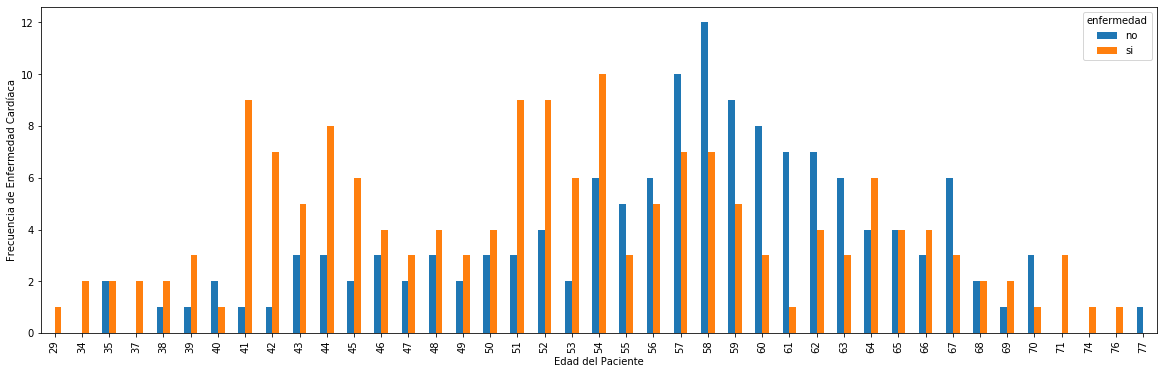

In [57]:
pd.crosstab(dt.edad, dt.enfermedad).plot(kind="bar", figsize=(20,6))
plt.xlabel('Edad del Paciente')
plt.ylabel('Frecuencia de Enfermedad Cardíaca')
plt.show()

Podemos visualizar la frecuencia de enfermedades cardíacas en relación al sexo de los pacientes:

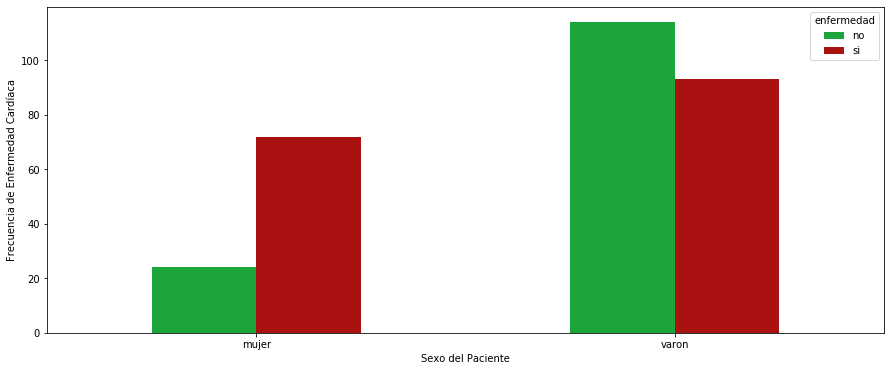

In [58]:
pd.crosstab(dt.sexo, dt.enfermedad).plot(kind="bar", figsize=(15,6), color=['#1CA53B','#AA1111'])
plt.xlabel('Sexo del Paciente')
plt.ylabel('Frecuencia de Enfermedad Cardíaca')
plt.xticks(rotation=0)
plt.show()

Podemos visualizar la frecuencia cardíaca en relación a la edad del paciente:

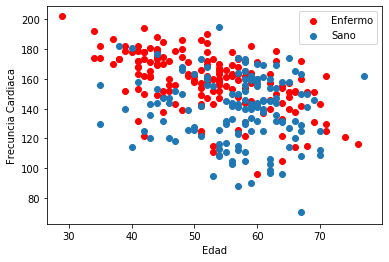

In [59]:
plt.scatter(x=dt.edad[dt.enfermedad=='si'], y=dt.frec_cardiaca[(dt.enfermedad=='si')], c="red")
plt.scatter(x=dt.edad[dt.enfermedad=='no'], y=dt.frec_cardiaca[(dt.enfermedad=='no')])
plt.legend(["Enfermo", "Sano"])
plt.xlabel("Edad")
plt.ylabel("Frecuncia Cardiaca")
plt.show()

Podemos visualizar la frecuencia de enfermedades cardíacas en relación a la glucemia en ayunas de los pacientes:

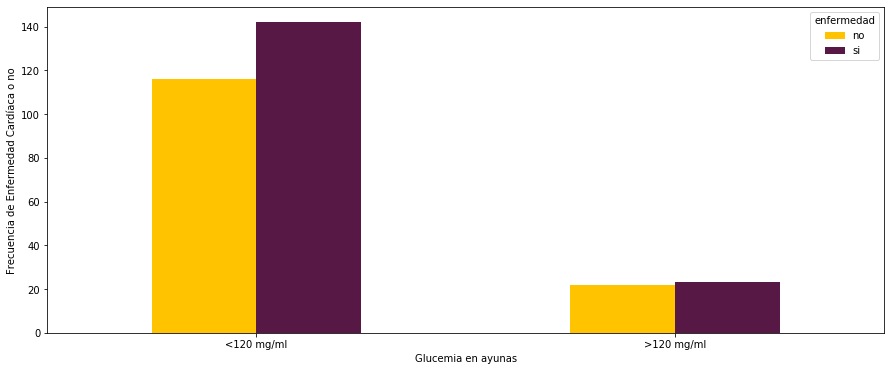

In [60]:
pd.crosstab(dt.glucemia, dt.enfermedad).plot(kind="bar", figsize=(15,6),color=['#FFC300','#581845'])
plt.xlabel('Glucemia en ayunas')
plt.ylabel('Frecuencia de Enfermedad Cardíaca o no')
plt.xticks(rotation = 0)
plt.show()

Podemos visualizar la frecuencia de enfermedades cardíacas en relación al tipo de dolor de pecho de los pacientes:

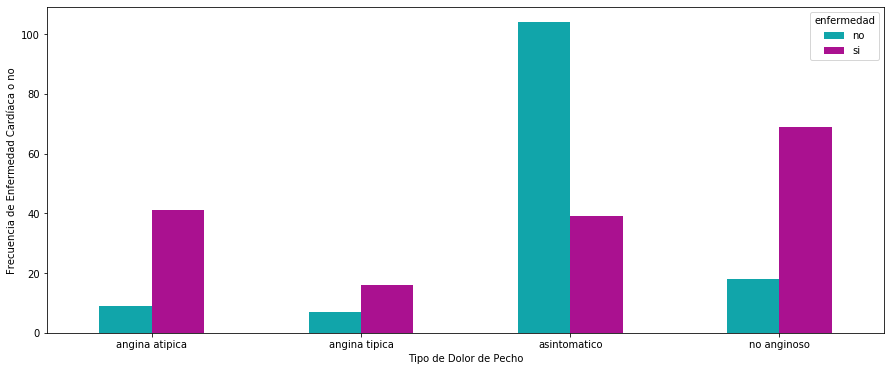

In [61]:
pd.crosstab(dt.dolor, dt.enfermedad).plot(kind="bar", figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.xlabel('Tipo de Dolor de Pecho')
plt.ylabel('Frecuencia de Enfermedad Cardíaca o no')
plt.xticks(rotation = 0)
plt.show()

Una vez visualizados los datos de forma entendible para cualquiera, vamos a volver a caragr el dataset y a tratarlos para aplicar sobre ellos distintas técnicas de Machine Learning. Lo primero es desechar las variables categóricas:

In [62]:
df = pd.read_csv("heart.csv")

a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [63]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1
